In [2]:
from sklearn.datasets import fetch_openml
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fetch Boston Housing dataset
boston = fetch_openml(name='boston', as_frame=True)

# Access the data and target variables
X_boston = boston.data  # Features
y_boston = boston.target  # Target variable


c:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


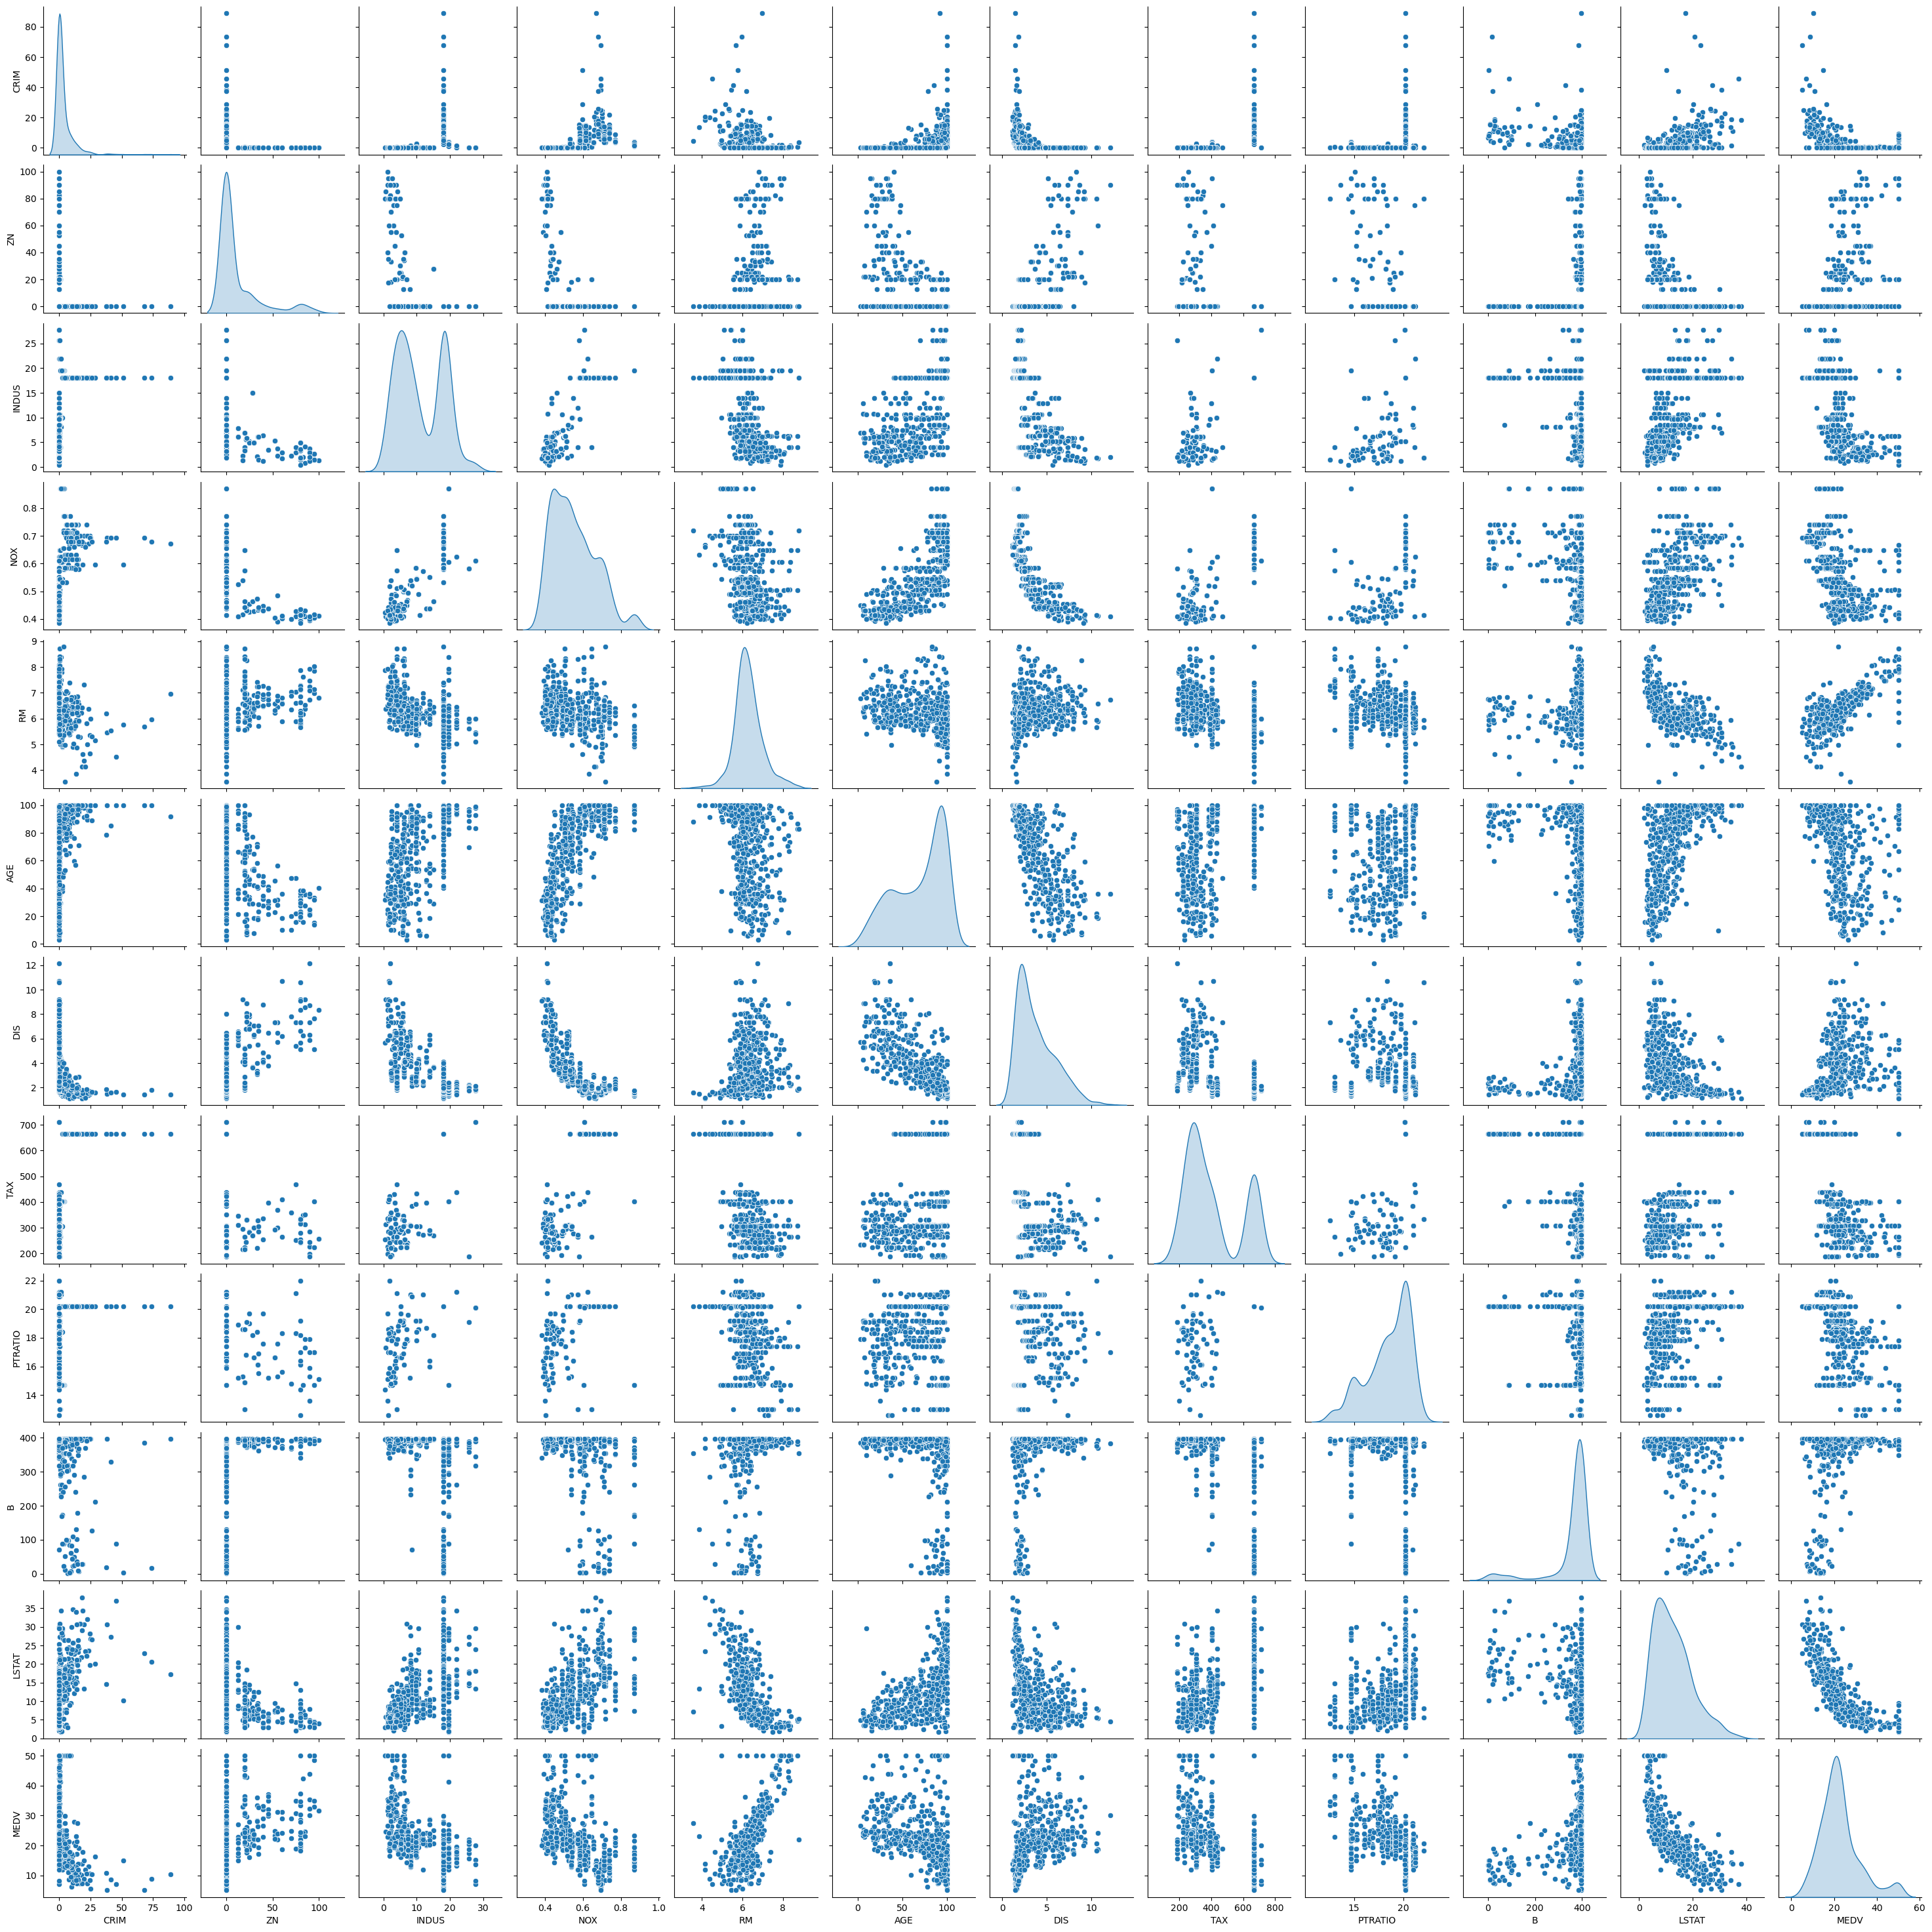

In [4]:

df_boston = pd.DataFrame(X_boston, columns=boston.feature_names)
df_boston['MEDV'] = y_boston

# Create a scatterplot matrix using seaborn
sns.pairplot(df_boston,diag_kind='kde')
plt.show()


In [5]:
X_boston=X_boston.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
baseline_mse = mean_squared_error(y_test, [y_train.mean()] * len(y_test))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
if mse < baseline_mse:
    print("Model outperforms baseline.")
else:
    print("Model does not outperform baseline.")
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Model outperforms baseline.
Mean Squared Error: 24.291119474973538
Mean Absolute Error: 3.1890919658878416
R-squared: 0.6687594935356317


C:\Users\Zmix\AppData\Local\Temp\ipykernel_11212\812710865.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(svd.singular_values_, shade=True)


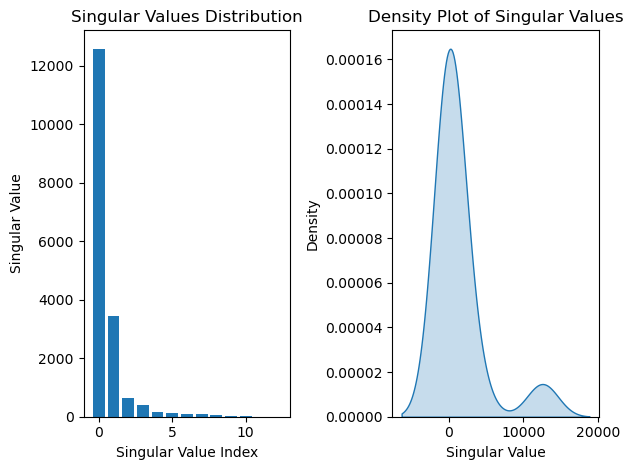

In [7]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_boston)

# Perform SVD
svd = TruncatedSVD(n_components=13)
X_svd = svd.fit_transform(X_boston)

# Plot singular values distribution
plt.subplot(1, 2, 1)
plt.bar(range(len(svd.singular_values_)), svd.singular_values_)
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value")
plt.title("Singular Values Distribution")

# Plot density plot of singular values
plt.subplot(1, 2, 2)
sns.kdeplot(svd.singular_values_, shade=True)
plt.xlabel("Singular Value")
plt.ylabel("Density")
plt.title("Density Plot of Singular Values")

plt.tight_layout()
plt.show()


C:\Users\Zmix\AppData\Local\Temp\ipykernel_11212\2695072729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_boston.corr()


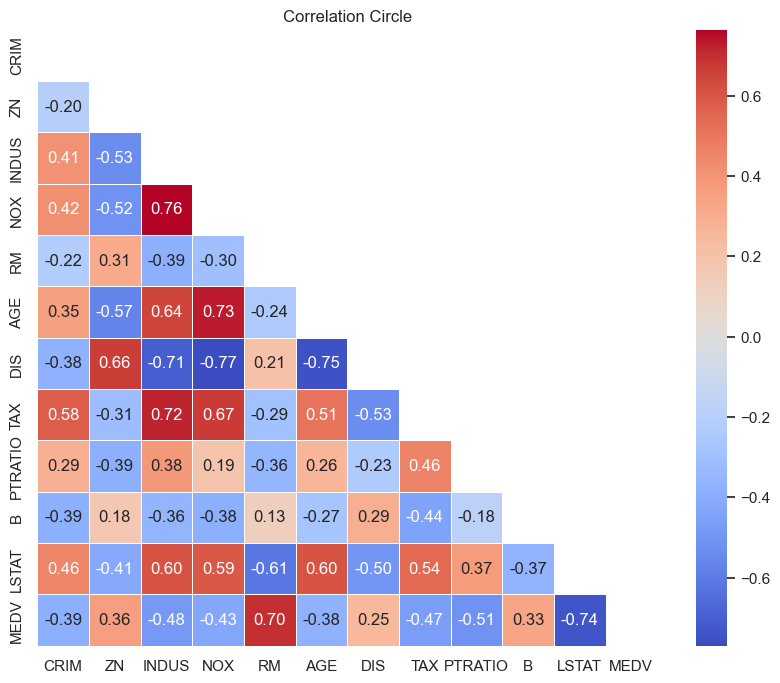

In [8]:
corr_matrix = df_boston.corr()
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the correlation circle using seaborn's heatmap
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

# Add axis labels and title
ax.set_title("Correlation Circle")
plt.show()


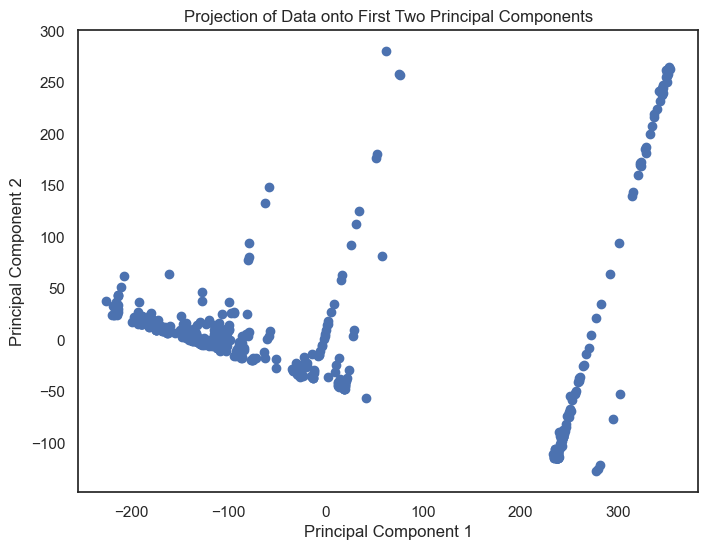

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_boston)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection of Data onto First Two Principal Components')
plt.show()

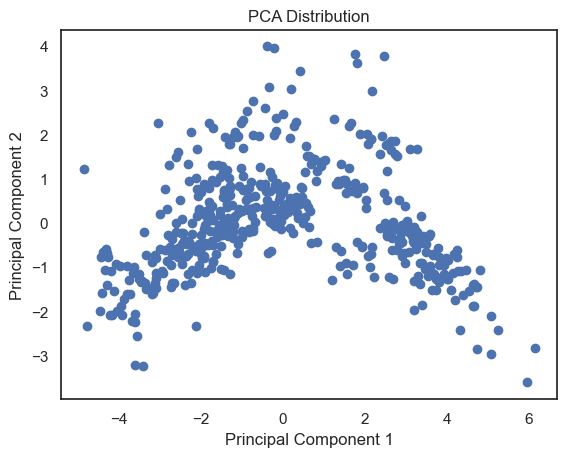

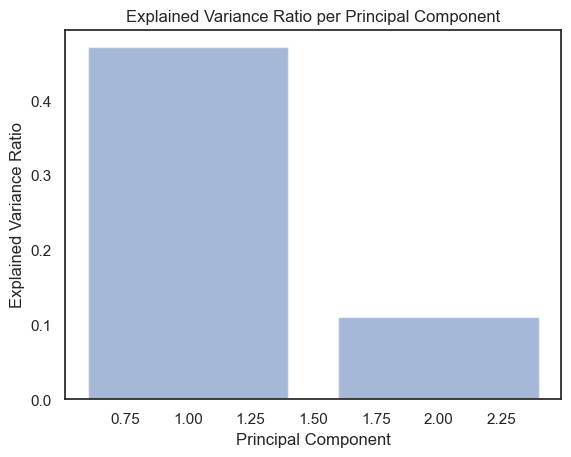

In [10]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_boston)
# Perform PCA
pca = PCA(n_components=2)  # Set the number of components to 2 for 2D visualization
principal_components = pca.fit_transform(scaled_data)
# Create a DataFrame with the principal components and their corresponding labels (if available)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
# Create a scatter plot of the PCA distribution
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Distribution')
plt.show()
# Create a bar plot of the explained variance ratio
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()
